In [25]:
import mujoco
import numpy as np
import mediapy as mpy

In [2]:
model = mujoco.MjModel.from_xml_path("./models/skydio_x2/scene.xml")
data = mujoco.MjData(model)
# data.geom_xpos
# view model element info
# model.geom('rotor1')

In [24]:
mujoco.mj_kinematics(model, data)
data.geom_xpos

array([[ 0.        ,  0.        ,  0.        ],
       [-0.00408066, -0.00025641,  0.162913  ],
       [ 0.04      ,  0.        ,  0.12      ],
       [ 0.04      ,  0.        ,  0.16      ],
       [-0.07      ,  0.        ,  0.165     ],
       [-0.137     ,  0.008     ,  0.165     ],
       [-0.14      , -0.18      ,  0.15      ],
       [-0.14      ,  0.18      ,  0.15      ],
       [ 0.14      ,  0.18      ,  0.18      ],
       [ 0.14      , -0.18      ,  0.18      ],
       [ 0.        ,  0.        ,  0.12      ]])

""

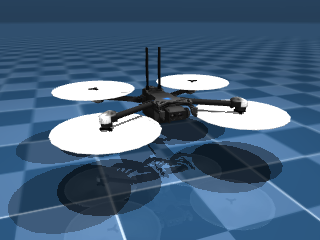

In [27]:
with mujoco.Renderer(model) as renderer:
    mujoco.mj_forward(model, data) # called by mj_step before integrating
    renderer.update_scene(data)
    mpy.show_image(renderer.render())

In [34]:
duration = 2
framerate = 60
model.opt.gravity = (0,0,0.1) # flip gravity so the drone hovers
frames = []
mujoco.mj_resetData(model, data) 
with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model, data)
        renderer.update_scene(data)
        frames.append(renderer.render())

mpy.show_video(frames, fps=framerate)

In [39]:
data.sensor('body_linacc')

<_MjDataSensorViews
  data: array([ 4.07714110e-04, -2.93135687e-23, -4.74662601e-03])
  id: 1
  name: 'body_linacc'
>